In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('image_data/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 198 images belonging to 2 classes.


In [3]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('image_data/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [4]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

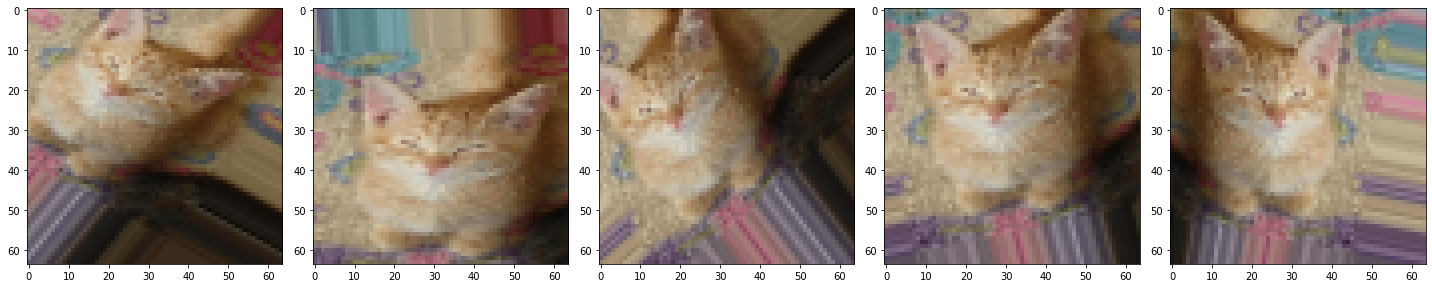

In [5]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

### Model Build Use Only CNN

In [6]:
from keras import Model,Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Conv2D, Conv1D, MaxPool2D, Reshape, Concatenate, Dropout , MaxPooling1D, Flatten,MaxPooling2D
from keras.layers import Dense, Input

## Single CNN

In [7]:
# # Part 2 - Building the CNN

# # Initialising the CNN
# cnn = Sequential()

# # Step 1 - # Adding a first convolutional layer
# cnn.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
# cnn.add(MaxPool2D(pool_size=2, strides=2))

# # Adding a second convolutional layer
# cnn.add(Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
# cnn.add(MaxPool2D(pool_size=2, strides=2))

# ###ann layer
# Dropout(0.5)
# # Step 3 - Flattening
# cnn.add(Flatten())

# # Step 4 - Full Connection
# cnn.add(Dense(units=128, activation='relu'))
# Dropout(0.5)

# # Step 5 - Output Layer
# cnn.add(Dense(units=1, activation='sigmoid'))

## Merge two CNN models

In [8]:
inp = Input((64, 64, 3))

model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_1.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_1.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(9 , activation='sigmoid'))

In [9]:
# inp2 = Input((32, 32, 3))
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_2.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_2.add(Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(9 , activation='sigmoid'))

In [10]:
# merged = Concatenate()([model_1(inp), model_2(inp2)])

merged = Concatenate()([model_1(inp), model_2(inp)])
output = Dense(1, activation='sigmoid')(merged)

In [11]:
# model_final =Model((inp,inp2),output)
model_final =Model(inp,output)

In [12]:
model_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 9)            77321       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 9)            77321       ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 18)           0           ['sequential[0][0]',             
                                                                  'sequential_1[0][0]']       

In [13]:
# Part 3 - Training the CNN

# Compiling the CNN
model_final.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Training the CNN on the Training set and evaluating it on the Test set
history =model_final.fit(x = training_set, validation_data = test_set, epochs = 1)

7/7 [==============================] - 10s 1s/step - loss: 0.7119 - accuracy: 0.4545 - val_loss: 0.6915 - val_accuracy: 0.5600
